<a href="https://colab.research.google.com/github/cesarorrr/Big-Data-Class/blob/main/Ejercicio_grupo_datos_preProyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Importamos las librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [10]:
borough_data = pd.read_json("/content/borough_data.json")
borough_data.head()

,the bronx,brooklyn,manhattan,queens,staten island
name,the bronx,brooklyn,manhattan,queens,staten island
population,1471160.0,2648771.0,1664727.0,2358582.0,479458.0
area,42.1,70.82,22.83,108.53,58.37


In [11]:
# Subimos los datos y asignamos a una variable

accidents = pd.read_csv("/content/accidents.csv",delimiter=";")
# accidents.head(-5)
# accidents.describe()
# accidents.shape
# accidents.isna().sum()
# accidents.shape
# Comprobamo cuantos valores nulos tenemos en la tabla y tenemos que verificar
accidents.isna().sum()

,0
DATE,0
TIME,0
BOROUGH,0
ZIP CODE,70
LATITUDE,6978
LONGITUDE,6978
ON STREET NAME,84604
NUMBER OF PEDESTRIANS INJURED,0
NUMBER OF PEDESTRIANS KILLED,0
NUMBER OF CYCLIST INJURED,0


In [12]:

accidents.isna().sum()

# Eliminas las filas donde los campos "LATITUDE","LONGITUDE" y "ZIP CODE" sean nulos ya que son campos unicos que no podemos generar o imputar en base a otros
accidents_clear = accidents.dropna(subset=['LATITUDE','LONGITUDE','ZIP CODE'])

# Como ya tenemos el codigo postal, latitud y longitud podemos eliminar la columna del barrio ya que no nos aporta informacion relevante y muchas son nulas
accidents_clear = accidents_clear.drop(columns=['ON STREET NAME'])

# Define las nuevas columnas a convertir
colums_to_convert = ['CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5','VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']

# Aplica la conversión a 1 o 0 según si es nulo o no nulo
accidents_clear[colums_to_convert] = accidents_clear[colums_to_convert].notnull().astype(int)

# Comprobamo cuantos valores nulos tenemos despues de imputar los valores nulos
accidents_clear.isna().sum()



,0
DATE,0
TIME,0
BOROUGH,0
ZIP CODE,0
LATITUDE,0
LONGITUDE,0
NUMBER OF PEDESTRIANS INJURED,0
NUMBER OF PEDESTRIANS KILLED,0
NUMBER OF CYCLIST INJURED,0
NUMBER OF CYCLIST KILLED,0


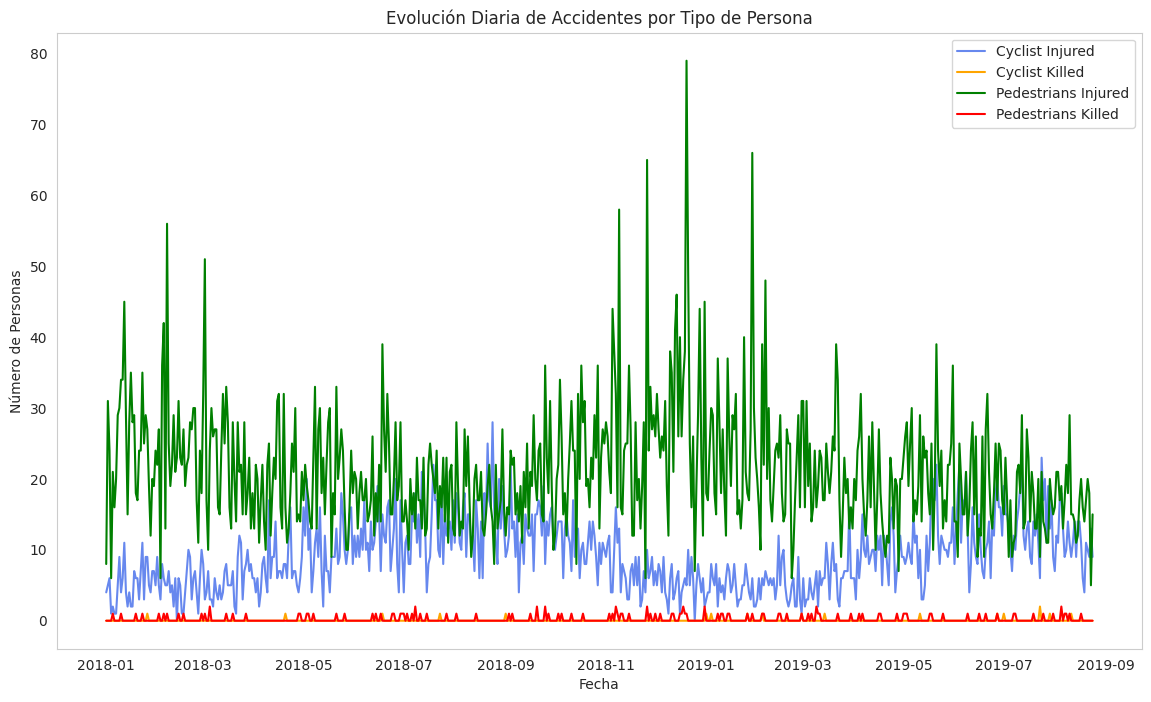

In [13]:

# Asegúramos que la columna DATE está en formato datetime
accidents_clear['DATE'] = pd.to_datetime(accidents_clear['DATE'])

# Agrupamos los datos por día y sumar el número de heridos y muertos por categoría
accidents_daily = accidents_clear.groupby('DATE').agg({
    'NUMBER OF CYCLIST INJURED': 'sum',
    'NUMBER OF CYCLIST KILLED': 'sum',
    'NUMBER OF PEDESTRIANS INJURED': 'sum',
    'NUMBER OF PEDESTRIANS KILLED': 'sum'
}).reset_index()

# Configuración del gráfico
plt.figure(figsize=(14, 8))

# Trazar cada categoría
plt.plot(accidents_daily['DATE'], accidents_daily['NUMBER OF CYCLIST INJURED'], label='Cyclist Injured', )
plt.plot(accidents_daily['DATE'], accidents_daily['NUMBER OF CYCLIST KILLED'], label='Cyclist Killed', color='orange')
plt.plot(accidents_daily['DATE'], accidents_daily['NUMBER OF PEDESTRIANS INJURED'], label='Pedestrians Injured', color='green')
plt.plot(accidents_daily['DATE'], accidents_daily['NUMBER OF PEDESTRIANS KILLED'], label='Pedestrians Killed', color='red')

# Personalizar el gráfico
plt.title('Evolución Diaria de Accidentes por Tipo de Persona')
plt.xlabel('Fecha')
plt.ylabel('Número de Personas')
plt.legend()
plt.grid()


# Mostrar el gráfico
plt.show()

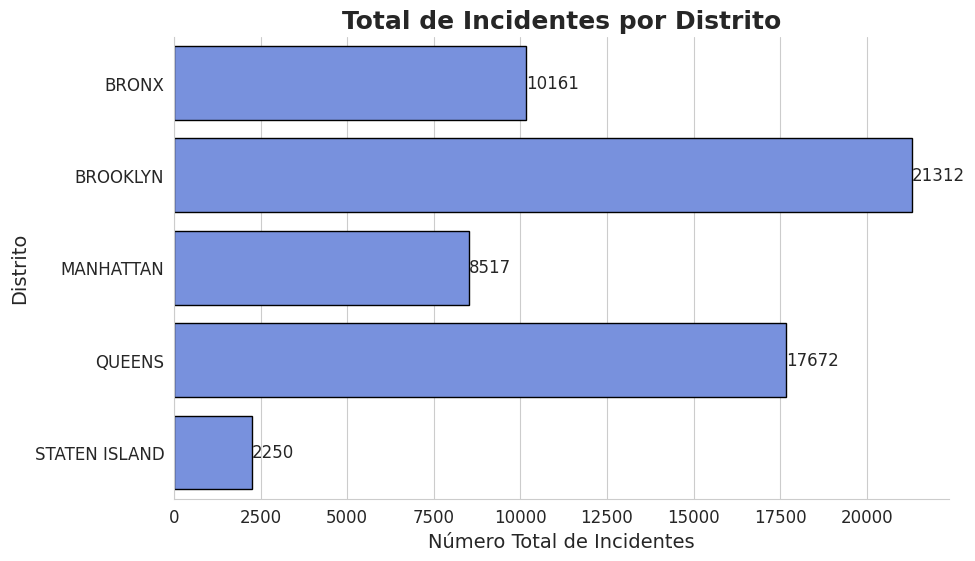

In [14]:
# Sumar el total de incidentes por cada fila en el DataFrame 'accidents_clear',
# sumando el número de peatones, ciclistas y automovilistas heridos o fallecidos.
accidents_clear['TOTAL_INCIDENTS'] = (
    accidents_clear['NUMBER OF PEDESTRIANS INJURED'] +
    accidents_clear['NUMBER OF PEDESTRIANS KILLED'] +
    accidents_clear['NUMBER OF CYCLIST INJURED'] +
    accidents_clear['NUMBER OF CYCLIST KILLED'] +
    accidents_clear['NUMBER OF MOTORIST INJURED'] +
    accidents_clear['NUMBER OF MOTORIST KILLED']
)

# Agrupar el DataFrame 'accidents_clear' por la columna 'BOROUGH' (distrito) y
# calcular la suma de 'TOTAL_INCIDENTS' para cada distrito.
# El resultado es un nuevo DataFrame 'incident_totals' con el total de incidentes por distrito.
incident_totals = accidents_clear.groupby('BOROUGH')['TOTAL_INCIDENTS'].sum().reset_index()

# Configurar el tamaño de la figura del gráfico
plt.figure(figsize=(10, 6))

# Establecer el estilo de fondo y la paleta de colores
sns.set_style("whitegrid")
sns.set_palette("coolwarm")

# Crear un gráfico de barras con 'BOROUGH' en el eje Y y 'TOTAL_INCIDENTS' en el eje X,
# utilizando el DataFrame 'incident_totals'. 'edgecolor' define el color de los bordes de las barras.
barplot = sns.barplot(
    x='TOTAL_INCIDENTS',
    y='BOROUGH',
    data=incident_totals,
    edgecolor='black'
)

# Título y etiquetas de los ejes, con configuraciones adicionales para el tamaño de fuente
plt.title('Total de Incidentes por Distrito', fontsize=18, fontweight='bold')
plt.xlabel('Número Total de Incidentes', fontsize=14)
plt.ylabel('Distrito', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Añadir etiquetas de números en cada barra, con formato de enteros y ajustadas en el borde de las barras
barplot.bar_label(barplot.containers[0], fmt='%d', fontsize=12, label_type='edge')

# Quitar los bordes superiores y derechos del gráfico para un diseño más limpio
sns.despine()

# Mostrar el gráfico final
plt.show()
